In [1]:
import pandas as pd
import math
from glob import glob
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore') 

In [3]:
#working with specific day

probbCutoff = 0.05
fcCutoff = 0

cases = {
            "stress-ready":{"1":[],"2":[],"3":[],"4":[]},
            "shared-response":{"1":[],"2":[]},
            "unique-response":{"1":[],"2":[],"3":[],"4":[]},
            "opposite-response":{"1":[],"2":[]},
            "no-response":{"1":[],"2":[],"3":[]},
        } #this will have the OG for each case
files = [file for file in glob("*.csv") if "ortho" not in file]
#looking for DE or not DE OG
data = {}
for file in files:
    dfAux = pd.read_csv(file)
    data[file] = {}
    for i in range(len(dfAux["Unnamed: 0"])):
        og = dfAux["Row.names"][i]
        de = 0
        if dfAux["padj"][i] < probbCutoff:
            de = 1
        data[file][og] = de
dfDE = pd.DataFrame(data)
#saving FC (up,down, none)
data = {}
for file in files:
    dfAux = pd.read_csv(file)
    data[file] = {}
    for i in range(len(dfAux["Unnamed: 0"])):
        og = dfAux["Row.names"][i]
        fc = 0
        if round(dfAux["log2FoldChange"][i],2) > fcCutoff:
            fc = 1
        elif round(dfAux["log2FoldChange"][i],2) < fcCutoff*-1:
            fc = -1
        data[file][og] = fc
dfFC = pd.DataFrame(data)

#looking for each OG
for i, og in enumerate(dfDE.index):
    DE_status_sly = dfDE["Sly.drought_Sly.control.csv"][i]
    DE_status_spenn = dfDE["Spenn.drought_Spenn.control.csv"][i]
    DE_status_spenn_control_sly_control = dfDE["Spenn.control_Sly.control.csv"][i]
    DE_status_spenn_drought_sly_control = dfDE["Spenn.drought_Sly.control.csv"][i]
    DE_status_sly_drought_spenn_control = dfDE["Sly.drought_Spenn.control.csv"][i]

    FC_status_sly= dfFC["Sly.drought_Sly.control.csv"][i]
    FC_status_spenn = dfFC["Spenn.drought_Spenn.control.csv"][i]
    FC_status_spenn_control_sly_control = dfFC["Spenn.control_Sly.control.csv"][i]


    #####################################################
    #stress ready case 1 and 2; unique response 3 and 4
    #####################################################
    if DE_status_sly == 0 and DE_status_spenn == 1: 
        #stress ready case 1 and unique response 3
        if  FC_status_spenn == 1:
            
            #stress ready case1
            if  DE_status_spenn_drought_sly_control == 0:
                cases["stress-ready"]["1"].append(og)

            #unique response 3
            else:
                cases["unique-response"]["3"].append(og)

        #stress ready case 2 and unique response 4
        else:
            #stress ready case1
            if  DE_status_spenn_drought_sly_control == 0:
                cases["stress-ready"]["2"].append(og)

            #unique response 3
            else:
                cases["unique-response"]["4"].append(og)
      
    #####################################################
    #stress ready case 1 and 2; unique response 3 and 4
    #####################################################
    elif DE_status_sly == 1 and DE_status_spenn == 0:
        #stress ready case 3 and unique response 1
        if  FC_status_sly == 1:
            
            #stress ready case3
            if  DE_status_sly_drought_spenn_control == 0:
                cases["stress-ready"]["3"].append(og)

            #unique response 1
            else:
               cases["unique-response"]["1"].append(og)
        
        #stress ready case 4 and unique response 2
        else:
            
            #stress ready case4
            if  DE_status_sly_drought_spenn_control == 0:
                cases["stress-ready"]["4"].append(og)

            #unique response 2
            else:
                cases["unique-response"]["2"].append(og)
 
    ################################
    #shared and opposite response
    ################################
    elif DE_status_sly == 1 and DE_status_spenn == 1: 
        #shared response 1
        if FC_status_sly == 1 and FC_status_spenn == 1:
            cases["shared-response"]["1"].append(og)
            
        #shared response 2
        elif FC_status_sly == -1 and FC_status_spenn == -1:
            cases["shared-response"]["2"].append(og)

        #opposite 1
        elif FC_status_sly == 1 and FC_status_spenn == -1:
            cases["opposite-response"]["1"].append(og)
            
        #opposite 2
        else:
            cases["opposite-response"]["2"].append(og)
        
    
    ##################################
    #no response
    ##################################
    else:
        if DE_status_spenn_control_sly_control == 1 and FC_status_spenn_control_sly_control == 1:
            cases["no-response"]["1"].append(og)
        elif DE_status_spenn_control_sly_control == 1 and FC_status_spenn_control_sly_control == -1:
            cases["no-response"]["2"].append(og)
        else:
            cases["no-response"]["3"].append(og)
print(f"Stress ready case 1: {len(cases['stress-ready']['1'])}, case2: {len(cases['stress-ready']['2'])}, case3:{len(cases['stress-ready']['3'])}, case4: {len(cases['stress-ready']['4'])}")
print(f"shared response case 1: {len(cases['shared-response']['1'])}, case2: {len(cases['shared-response']['2'])}")
print(f"Unique response case 1: {len(cases['unique-response']['1'])}, case2: {len(cases['unique-response']['2'])}, case3:{len(cases['unique-response']['3'])}, case4: {len(cases['unique-response']['4'])}")
print(f"opposite response case 1: {len(cases['opposite-response']['1'])}, case2: {len(cases['opposite-response']['2'])}")
print(f"No response case 1: {len(cases['no-response']['1'])}, case2: {len(cases['no-response']['2'])}, case3: {len(cases['no-response']['3'])}")
print("####################################################################################################################\n")



    #for response in cases:
    #    for case in cases[response]:
    #        with open(day+"_"+response+"_"+case+".log", "w") as f:
    #            for orthogroup in cases[response][case]:
    #                f.write(orthogroup+"\n")

Stress ready case 1: 217, case2: 230, case3:570, case4: 537
shared response case 1: 1039, case2: 1671
Unique response case 1: 1293, case2: 1232, case3:433, case4: 359
opposite response case 1: 21, case2: 79
No response case 1: 2184, case2: 2208, case3: 6019
####################################################################################################################



In [7]:
dfFC.loc["ortholog_21077"]

Spenn.drought_Spenn.control.csv    0
Spenn.control_Sly.control.csv      1
Sly.drought_Spenn.control.csv     -1
Spenn.drought_Sly.control.csv      1
Sly.drought_Sly.control.csv        0
Name: ortholog_21077, dtype: int64

In [7]:
#dfDE.loc["ortholog_21077"]["Sly.drought_Sly.control.csv"]
dfFC

,Spenn.drought_Spenn.control.csv,Spenn.control_Sly.control.csv,Sly.drought_Spenn.control.csv,Spenn.drought_Sly.control.csv,Sly.drought_Sly.control.csv
ortholog_5952,-1,1,-1,-1,-1
ortholog_15338,-1,1,-1,-1,-1
ortholog_6987,-1,1,-1,-1,-1
ortholog_20937,-1,1,-1,-1,-1
ortholog_11984,-1,1,-1,-1,-1
...,...,...,...,...,...
ortholog_21077,-1,1,-1,1,0
ortholog_21111,0,-1,1,-1,1
ortholog_21147,0,-1,1,-1,1
ortholog_6677,1,-1,1,-1,1


In [4]:
for response in cases:
    for case in cases[response]:
        with open(response+"_"+case+".log","w") as f:
            for ortholog in cases[response][case]:
                f.write(ortholog+"\n")

#Stress ready case 1: 217, case2: 230, case3:570, case4: 537


In [1]:
import matplotlib.pyplot as plt
import matplotlib

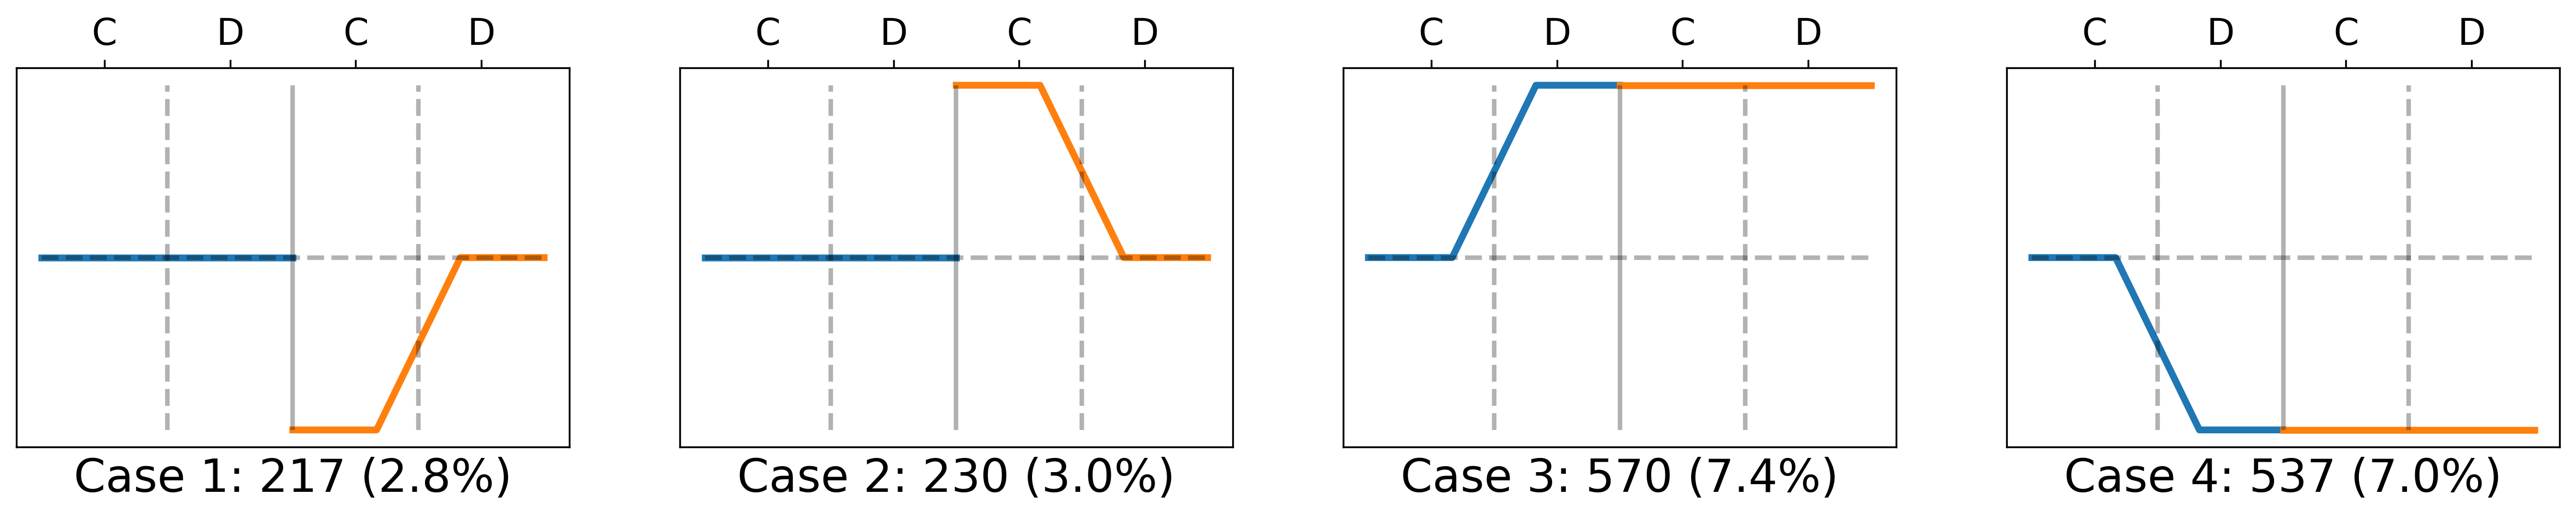

In [2]:
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True,figsize=(20,3), dpi=300)
axs[0].plot([0,1,2,3],[0,0,0,0],label="$\it{S. lycopersicum}$",linewidth=3)
axs[0].plot([3,4,5,6],[-1,-1,0,0],label="$\it{S. Pennellii}$",linewidth=3)
axs[0].vlines(1.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[0].vlines(3, -1,1, colors='k', linestyles='-', alpha=0.3,linewidth=2)
axs[0].vlines(4.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[0].hlines(0, 0,6, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[0].set_yticks([-1,0,1],[-1,0,1])
axs[0].set_xticks([.75, 2.25, 3.75, 5.25],["C", "D","C", "D"], fontsize=16)
axs[0].set_yticks([])
axs[0].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs[0].set_xlabel("Case 1: 217 (2.8%)", fontsize=20)
 
#SR 2
axs[1].plot([0,1,2,3],[0,0,0,0],label="S. lycopersicum",linewidth=3)
axs[1].plot([3,4,5,6],[1,1,0,0],label="S. Pennellii",linewidth=3)
axs[1].vlines(1.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[1].vlines(3, -1,1, colors='k', linestyles='-', alpha=0.3,linewidth=2)
axs[1].vlines(4.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[1].hlines(0, 0,6, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[1].set_yticks([])
axs[1].set_xticks([.75, 2.25, 3.75, 5.25],["C", "D","C", "D"], fontsize=16)
axs[1].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs[1].set_xlabel("Case 2: 230 (3.0%)", fontsize=20)

#SR 3
axs[2].plot([0,1,2,3],[0,0,1,1],label="S. lycopersicum",linewidth=3)
axs[2].plot([3,4,5,6],[1,1,1,1],label="S. Pennellii",linewidth=3)
axs[2].vlines(1.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[2].vlines(3, -1,1, colors='k', linestyles='-', alpha=0.3,linewidth=2)
axs[2].vlines(4.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[2].hlines(0, 0,6, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[2].set_yticks([])
axs[2].set_xticks([.75, 2.25, 3.75, 5.25],["C", "D","C", "D"], fontsize=16)
axs[2].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs[2].set_xlabel("Case 3: 570 (7.4%)", fontsize=20)

#SR 4
axs[3].plot([0,1,2,3],[0,0,-1,-1],label="S. lycopersicum",linewidth=3)
axs[3].plot([3,4,5,6],[-1,-1,-1,-1],label="S. Pennellii",linewidth=3)
axs[3].vlines(1.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[3].vlines(3, -1,1, colors='k', linestyles='-', alpha=0.3,linewidth=2)
axs[3].vlines(4.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[3].hlines(0, 0,6, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[3].set_yticks([])
axs[3].set_xticks([.75, 2.25, 3.75, 5.25],["C", "D","C", "D"], fontsize=16)
axs[3].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs[3].set_xlabel("Case 4: 537 (7.0%)", fontsize=20)

plt.savefig("stress_ready.pdf")

#Stress ready case 1: 218, case2: 229, case3:571, case4: 545



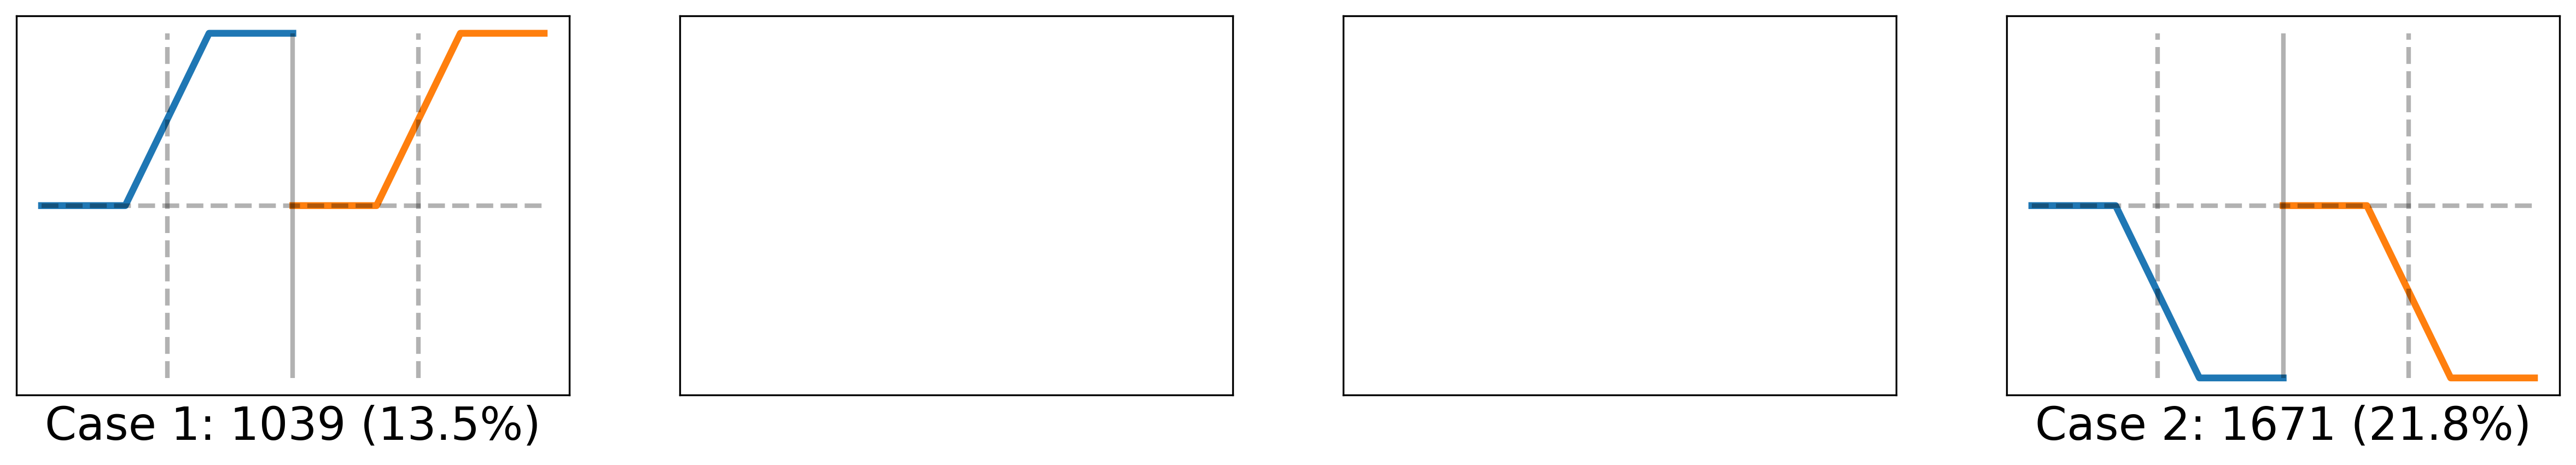

In [3]:
#shared response

fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True,figsize=(20,3), dpi=300)
axs[0].plot([0,1,2,3],[0,0,1,1],label="$\it{S. lycopersicum}$",linewidth=3)
axs[0].plot([3,4,5,6],[0,0,1,1],label="$\it{S. Pennellii}$",linewidth=3)
axs[0].vlines(1.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[0].vlines(3, -1,1, colors='k', linestyles='-', alpha=0.3,linewidth=2)
axs[0].vlines(4.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[0].hlines(0, 0,6, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[0].set_yticks([-1,0,1],[-1,0,1])
axs[0].set_yticks([])
axs[0].set_xticks([])
axs[0].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs[0].set_xlabel("Case 1: 1039 (13.5%)", fontsize=20)

#SR 4
axs[3].plot([0,1,2,3],[0,0,-1,-1],label="S. lycopersicum",linewidth=3)
axs[3].plot([3,4,5,6],[0,0,-1,-1],label="S. Pennellii",linewidth=3)
axs[3].vlines(1.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[3].vlines(3, -1,1, colors='k', linestyles='-', alpha=0.3,linewidth=2)
axs[3].vlines(4.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[3].hlines(0, 0,6, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[3].set_yticks([-1,0,1],[-1,0,1])
axs[3].set_yticks([])
axs[3].set_xlabel("Case 2: 1671 (21.8%)", fontsize=20)
plt.savefig("shared-response.pdf")
#shared response case 1: 1039, case2: 1671


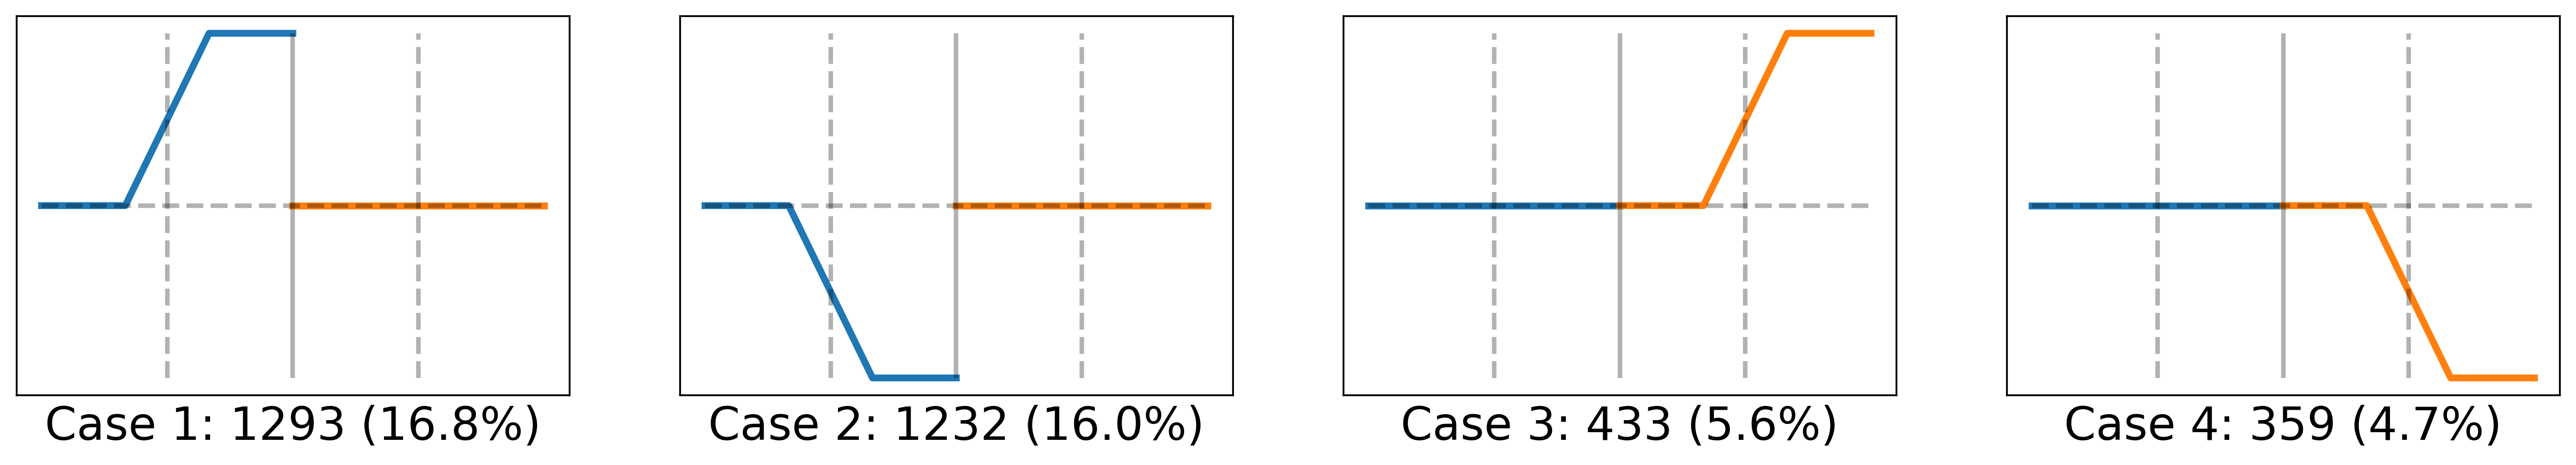

In [4]:
#unique response
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True,figsize=(20,3), dpi=300)
axs[0].plot([0,1,2,3],[0,0,1,1],label="$\it{S. lycopersicum}$",linewidth=3)
axs[0].plot([3,4,5,6],[0,0,0,0],label="$\it{S. Pennellii}$",linewidth=3)
axs[0].vlines(1.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[0].vlines(3, -1,1, colors='k', linestyles='-', alpha=0.3,linewidth=2)
axs[0].vlines(4.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[0].hlines(0, 0,6, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[0].set_yticks([])
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs[0].set_xlabel("Case 1: 1293 (16.8%)", fontsize=20)

#fig.legend(loc='center left', bbox_to_anchor=(0.9, 0.5), fontsize=20)
#SR 2
axs[1].plot([0,1,2,3],[0,0,-1,-1],label="S. lycopersicum",linewidth=3)
axs[1].plot([3,4,5,6],[0,0,0,0],label="S. Pennellii",linewidth=3)
axs[1].vlines(1.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[1].vlines(3, -1,1, colors='k', linestyles='-', alpha=0.3,linewidth=2)
axs[1].vlines(4.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[1].hlines(0, 0,6, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[1].set_yticks([])
axs[1].set_xticks([])
axs[1].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs[1].set_xlabel("Case 2: 1232 (16.0%)", fontsize=20)

#SR 3
axs[2].plot([0,1,2,3],[0,0,0,0],label="S. lycopersicum",linewidth=3)
axs[2].plot([3,4,5,6],[0,0,1,1],label="S. Pennellii",linewidth=3)
axs[2].vlines(1.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[2].vlines(3, -1,1, colors='k', linestyles='-', alpha=0.3,linewidth=2)
axs[2].vlines(4.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[2].hlines(0, 0,6, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[2].set_yticks([])
axs[2].set_xticks([])
axs[2].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs[2].set_xlabel("Case 3: 433 (5.6%)", fontsize=20)

#SR 4
axs[3].plot([0,1,2,3],[0,0,0,0],label="S. lycopersicum",linewidth=3)
axs[3].plot([3,4,5,6],[0,0,-1,-1],label="S. Pennellii",linewidth=3)
axs[3].vlines(1.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[3].vlines(3, -1,1, colors='k', linestyles='-', alpha=0.3,linewidth=2)
axs[3].vlines(4.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[3].hlines(0, 0,6, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[3].set_yticks([])
axs[3].set_xticks([])
axs[3].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs[3].set_xlabel("Case 4: 359 (4.7%)", fontsize=20)

plt.savefig("unique_response.pdf")


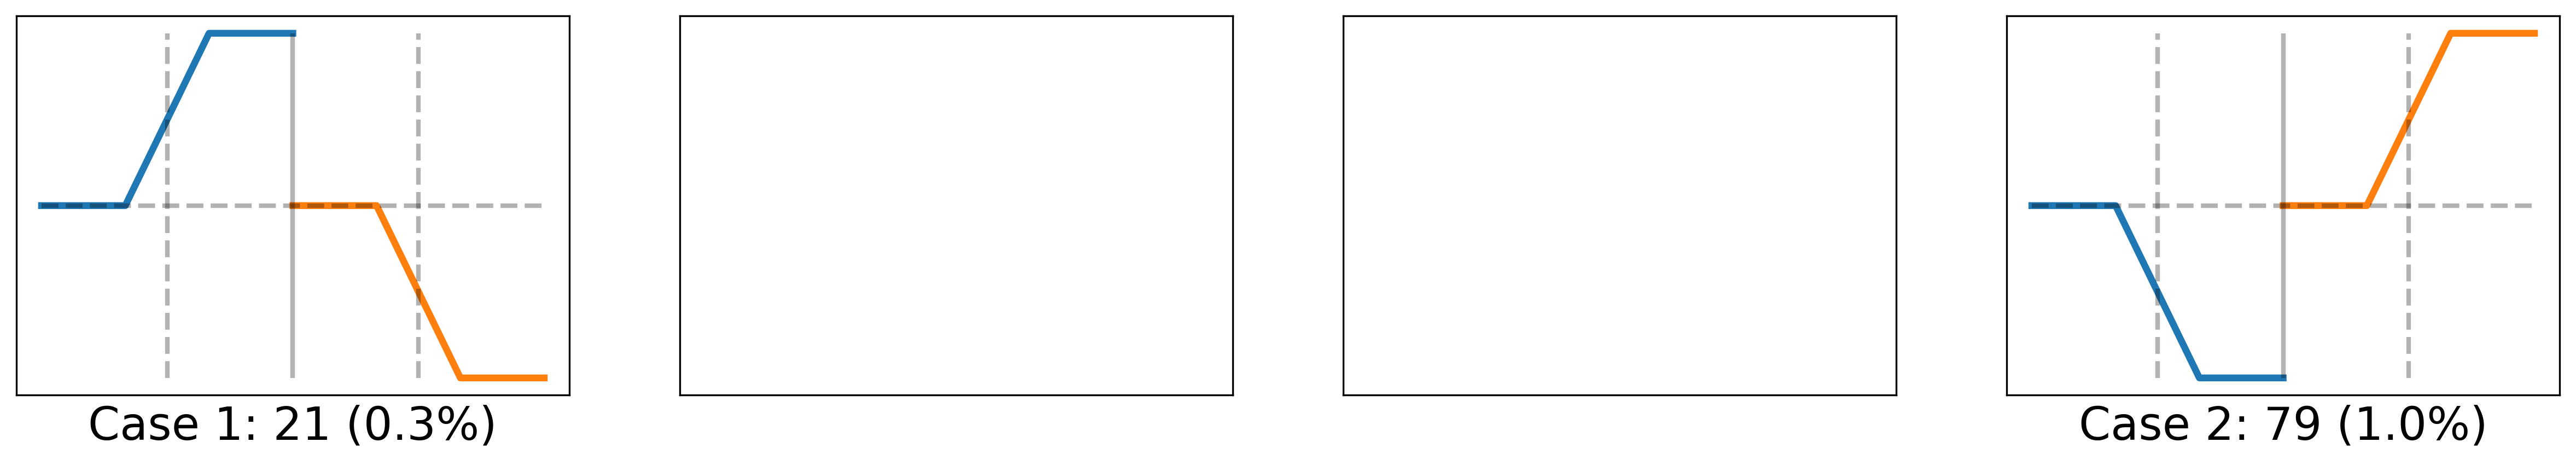

In [5]:
#opposite response

fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True,figsize=(20,3), dpi=300)
axs[0].plot([0,1,2,3],[0,0,1,1],label="$\it{S. lycopersicum}$",linewidth=3)
axs[0].plot([3,4,5,6],[0,0,-1,-1],label="$\it{S. Pennellii}$",linewidth=3)
axs[0].vlines(1.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[0].vlines(3, -1,1, colors='k', linestyles='-', alpha=0.3,linewidth=2)
axs[0].vlines(4.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[0].hlines(0, 0,6, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[0].set_yticks([-1,0,1],[-1,0,1])
axs[0].set_yticks([])
axs[0].set_xticks([])
axs[0].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs[0].set_xlabel("Case 1: 21 (0.3%)", fontsize=20)


axs[3].plot([0,1,2,3],[0,0,-1,-1],label="S. lycopersicum",linewidth=3)
axs[3].plot([3,4,5,6],[0,0,1,1],label="S. Pennellii",linewidth=3)
axs[3].vlines(1.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[3].vlines(3, -1,1, colors='k', linestyles='-', alpha=0.3,linewidth=2)
axs[3].vlines(4.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[3].hlines(0, 0,6, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[3].set_yticks([-1,0,1],[-1,0,1])
axs[3].set_yticks([])
axs[3].set_xlabel("Case 2: 79 (1.0%)", fontsize=20)
plt.savefig("opposite_response.pdf")
#Unique response case 1: , case2: , case3:, case4: 
#opposite response case 1: 21, case2: 79


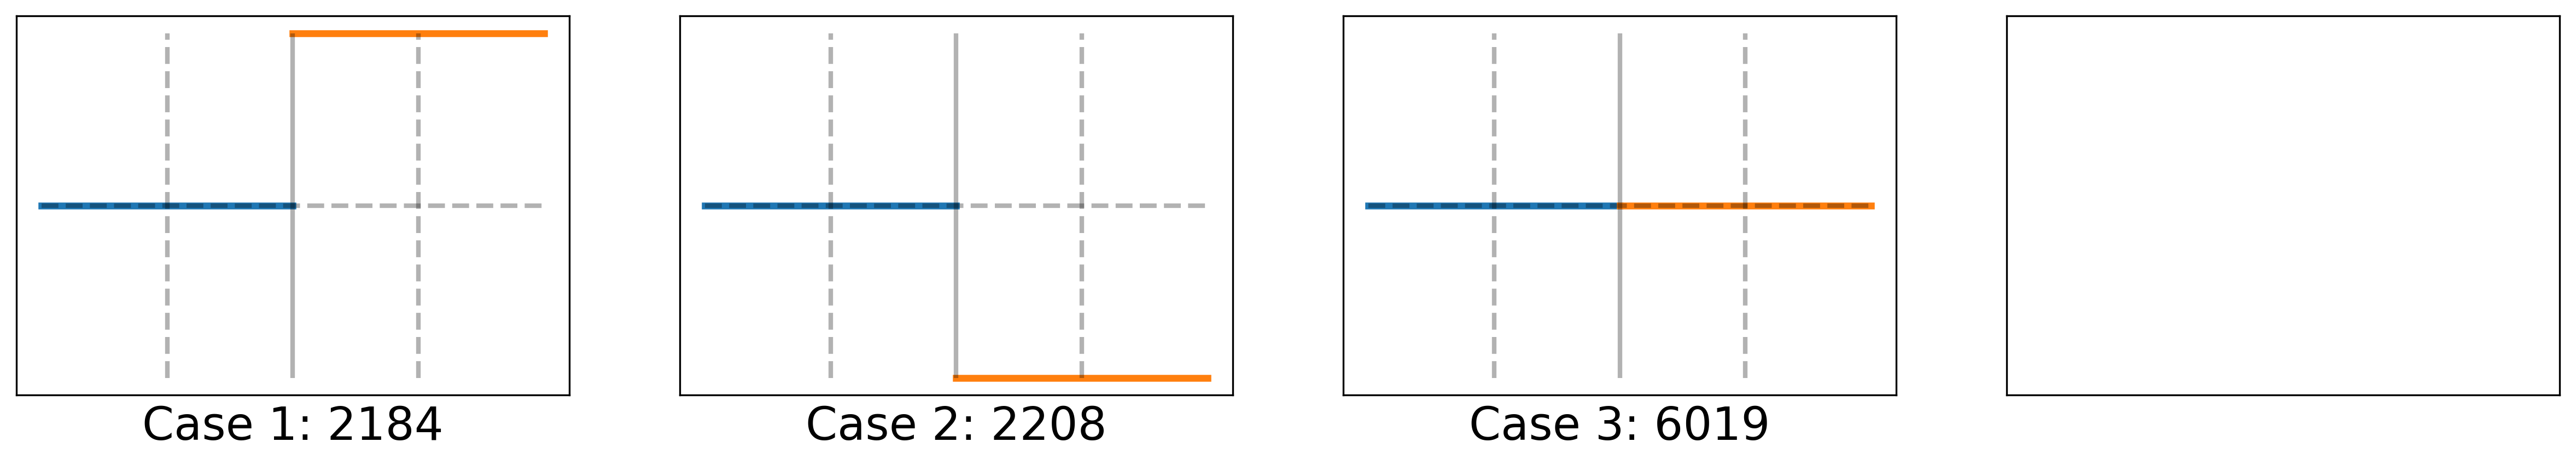

In [10]:
#no response
fig, axs = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True,figsize=(20,3), dpi=300)
axs[0].plot([0,1,2,3],[0,0,0,0],label="$\it{S. lycopersicum}$",linewidth=3)
axs[0].plot([3,4,5,6],[1,1,1,1],label="$\it{S. Pennellii}$",linewidth=3)
axs[0].vlines(1.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[0].vlines(3, -1,1, colors='k', linestyles='-', alpha=0.3,linewidth=2)
axs[0].vlines(4.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[0].hlines(0, 0,6, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[0].set_yticks([])
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs[0].set_xlabel("Case 1: 2184", fontsize=20)

#fig.legend(loc='center left', bbox_to_anchor=(0.9, 0.5), fontsize=20)
#SR 2
axs[1].plot([0,1,2,3],[0,0,0,0],label="S. lycopersicum",linewidth=3)
axs[1].plot([3,4,5,6],[-1,-1,-1,-1],label="S. Pennellii",linewidth=3)
axs[1].vlines(1.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[1].vlines(3, -1,1, colors='k', linestyles='-', alpha=0.3,linewidth=2)
axs[1].vlines(4.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[1].hlines(0, 0,6, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[1].set_yticks([])
axs[1].set_xticks([])
axs[1].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs[1].set_xlabel("Case 2: 2208", fontsize=20)


#SR 3
axs[2].plot([0,1,2,3],[0,0,0,0],label="S. lycopersicum",linewidth=3)
axs[2].plot([3,4,5,6],[0,0,0,0],label="S. Pennellii",linewidth=3)
axs[2].vlines(1.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[2].vlines(3, -1,1, colors='k', linestyles='-', alpha=0.3,linewidth=2)
axs[2].vlines(4.5, -1,1, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[2].hlines(0, 0,6, colors='k', linestyles='--', alpha=0.3,linewidth=2)
axs[2].set_yticks([])
axs[2].set_xticks([])
axs[2].tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
axs[2].set_xlabel("Case 3: 6019", fontsize=20)
#SR 4
plt.savefig("no_response.pdf")
#No response case 1: 2198, case2: 2231, case3: 6046
#No response case 1: 2184, case2: 2208, case3: 6019